<a href="https://colab.research.google.com/github/SiLiKhon/RICH_GAN_misc/blob/master/RICH_Data_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RICH Data Overview

## Get the data

The training sample is shared [here](https://cernbox.cern.ch/index.php/s/RkZoMRBofrhqzZm).

These are simulated detector responses for 6 particle types (below are per-file links to the same files as above):



*   electrons https://cernbox.cern.ch/index.php/s/q5ZwDYfvOXJmnBR
*   kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q
*   muons https://cernbox.cern.ch/index.php/s/jfw0Nhyw8gYNBhk
*   pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
*   protons https://cernbox.cern.ch/index.php/s/SQ6G6dmLOLTvMuz
*   ghosts https://cernbox.cern.ch/index.php/s/9Ui4xKerEDdw7Fv (these are 'fake' tracks - i.e. random tracker hits that look like a track from a real particle)



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, product

import matplotlib.colors as colors
%matplotlib inline

In [9]:
df_pion = pd.read_csv('data_csv/v1_pion_train.csv')
df_kaon = pd.read_csv('data_csv/v1_kaon_train.csv')

In [10]:
print(df_pion.columns)
print(df_kaon.columns)

Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')


Input variables are:
*   `TrackP` – full momentum of the particle
*   `TrackPt` – length of the momentum projection to the XY plane
*   `TrackEta` – track [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)
*   `NumLongTracks` – number of reconstructed tracks in current event

Please note that among P, Pt and ETA there are only **two** independant variables. 


The variables to predict are:

*   `RichDLLbt`
*   `RichDLLk`
*   `RichDLLmu`
*   `RichDLLp`
*   `RichDLLe`


There's also one additional variable:

*   `MCParticleType` – particle [PDG code](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)




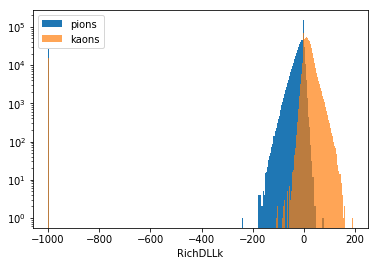

In [4]:
bins = np.linspace(
        start=min(df_pion.RichDLLk.min(), df_kaon.RichDLLk.min()), 
        stop =max(df_pion.RichDLLk.max(), df_kaon.RichDLLk.max()), 
        num=601
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

One can see there's a peak of outliers at the left handside of the plot. Let's not bother about it so far.

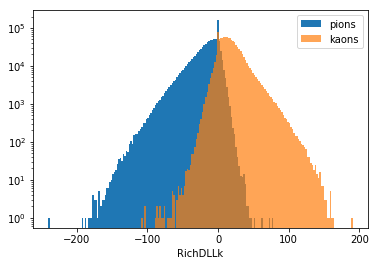

In [12]:
not_outlier_pion = df_pion.RichDLLk > -500
not_outlier_kaon = df_kaon.RichDLLk > -500

bins = np.linspace(
        start=min(df_pion.RichDLLk[not_outlier_pion].min(), df_kaon.RichDLLk[not_outlier_kaon].min()), 
        stop =max(df_pion.RichDLLk[not_outlier_pion].max(), df_kaon.RichDLLk[not_outlier_kaon].max()), 
        num=201
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

In [6]:
def hist2d(df1,df2,col1,col2,name1,name2, bins1,bins2):
    
    fig, (ax1, ax2) = plt.subplots(
                                    nrows=1,
                                    ncols=2,
                                    figsize=(15, 6)
                                )

    _, bins_x, bins_y, img1 = \
        ax1.hist2d(
            x=df1[col1],
            y=df1[col2],
            bins=(bins1, bins2),
            cmap='inferno',
            norm=colors.LogNorm()
        )
    _, _, _, img2 = \
        ax2.hist2d(
            x=df2[col1],
            y=df2[col2],
            bins=(bins_x, bins_y),
            cmap='inferno',
            norm=colors.LogNorm()
        )
    plt.colorbar(img1, ax=ax1)
    plt.colorbar(img2, ax=ax2)
    ax1.set_xlabel(col1)
    ax2.set_xlabel(col1)
    ax1.set_ylabel(col2)
    ax2.set_ylabel(col2)
    ax1.set_title(name1)
    ax2.set_title(name2)
    fig.tight_layout();

In [20]:
def hist2d(dfs,names,col1,col2, bins1,bins2):
    n = len(dfs)
    fig, axes = plt.subplots(
                                    nrows=1,
                                    ncols=n,
                                    figsize=(15, 6)
                                )

        
    _, bins_x, bins_y, img = \
        axes[0].hist2d(
            x=dfs[0][col1],
            y=dfs[0][col2],
            bins=(bins1, bins2),
            cmap='inferno',
            norm=colors.LogNorm()
        )
    imgs = [img]
    
    for i, df in enumerate(dfs[1:]):
        _, _, _, img = axes[i+1].hist2d(x=df[col1],
                                        y=df[col2],
                                        bins=(bins_x, bins_y),
                                        cmap='inferno',
                                        norm=colors.LogNorm())
        imgs.append(img)
            

    for i, img in enumerate(imgs):
        plt.colorbar(img, ax = axes[i])
    
    for i,ax in enumerate(axes):
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(names[i])
    fig.tight_layout();

In [ ]:
def hist2d(dfs,names,cols2,cols2):
    n = len(dfs)
    m = len(cols1)*len(cols2)
    fig, axes = plt.subplots(
                                    nrows=m,
                                    ncols=n,
                                    figsize=(15, 6)
                                )

        
    _, bins_x, bins_y, img = \
        axes[0].hist2d(
            x=dfs[0][col1],
            y=dfs[0][col2],
            bins=(bins1, bins2),
            cmap='inferno',
            norm=colors.LogNorm()
        )
    imgs = [img]
    
    for i, df in enumerate(dfs[1:]):
        _, _, _, img = axes[i+1].hist2d(x=df[col1],
                                        y=df[col2],
                                        bins=(bins_x, bins_y),
                                        cmap='inferno',
                                        norm=colors.LogNorm())
        imgs.append(img)
            

    for i, img in enumerate(imgs):
        plt.colorbar(img, ax = axes[i])
    
    for i,ax in enumerate(axes):
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(names[i])
    fig.tight_layout();

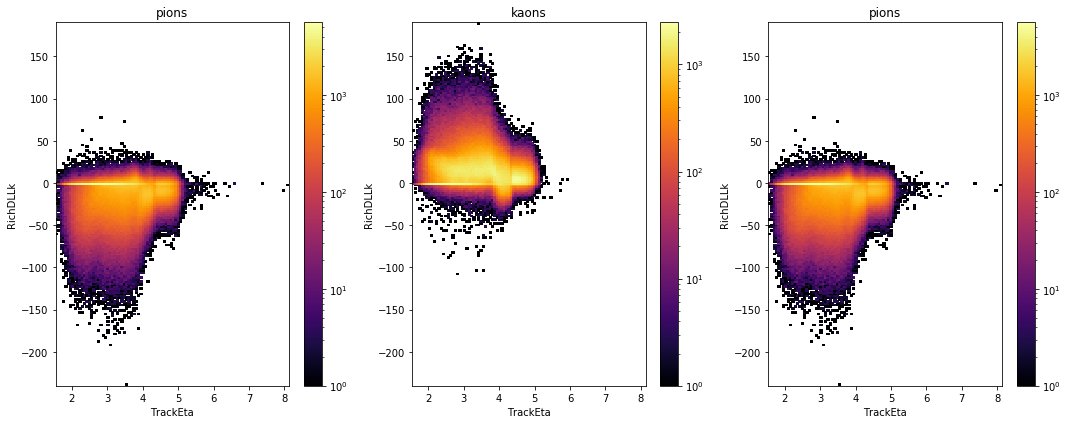

In [21]:
hist2d([df_pion,df_kaon,df_pion],['pions','kaons','pions'],'TrackEta','RichDLLk',100, bins)

In [8]:
def not_outliers(df,m):
    left = (df >= df.median() - df.std()*m).all(axis=1)
    right = (df <= df.median() + df.std()*m).all(axis=1)
    return left&right

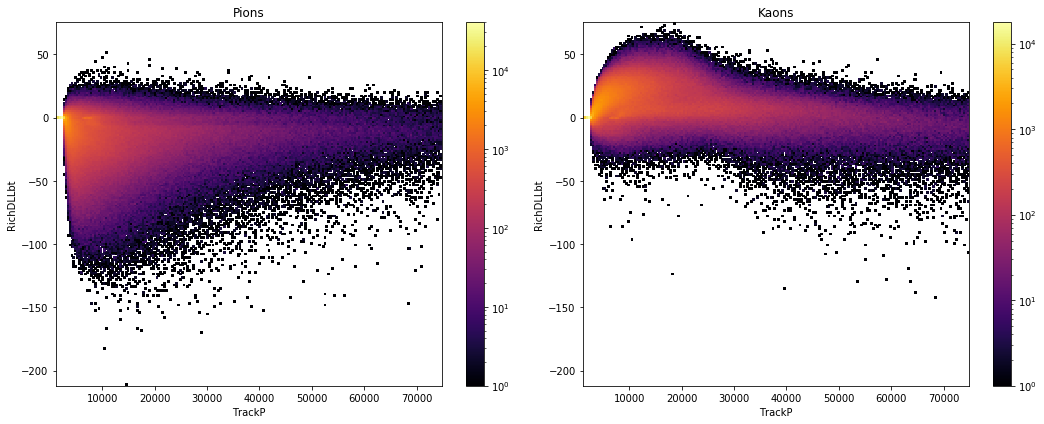

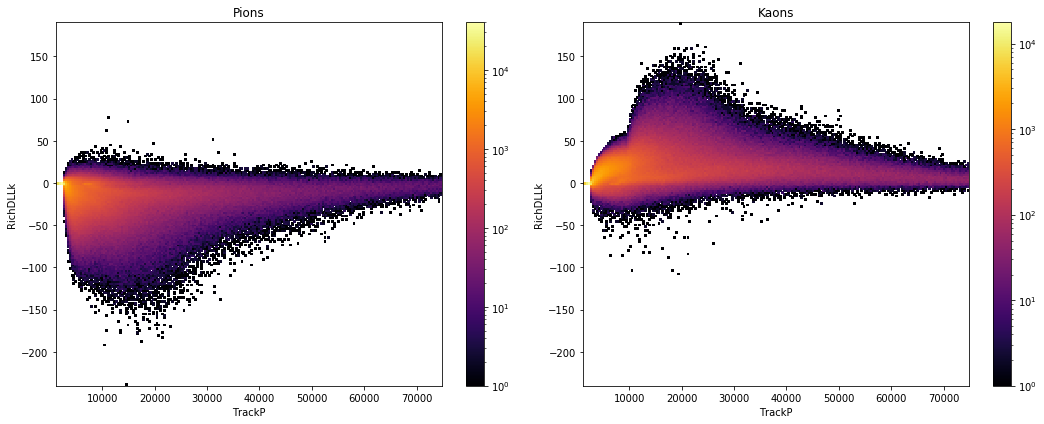

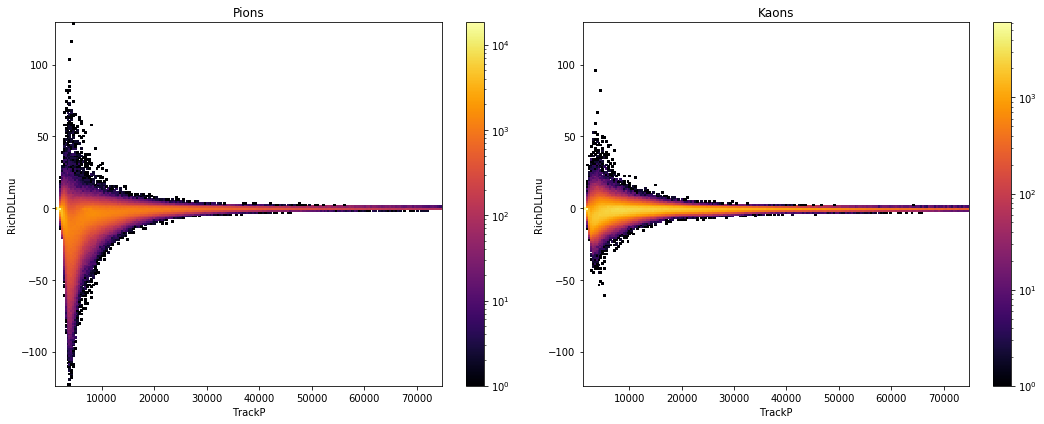

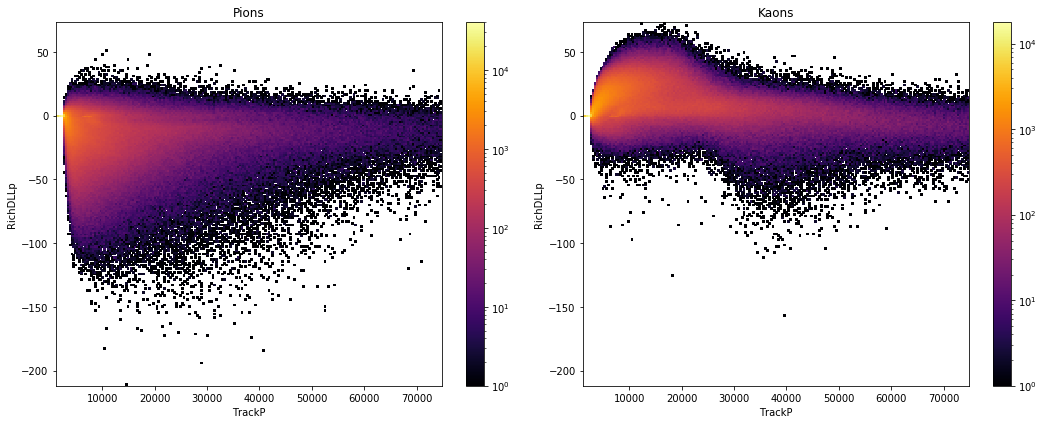

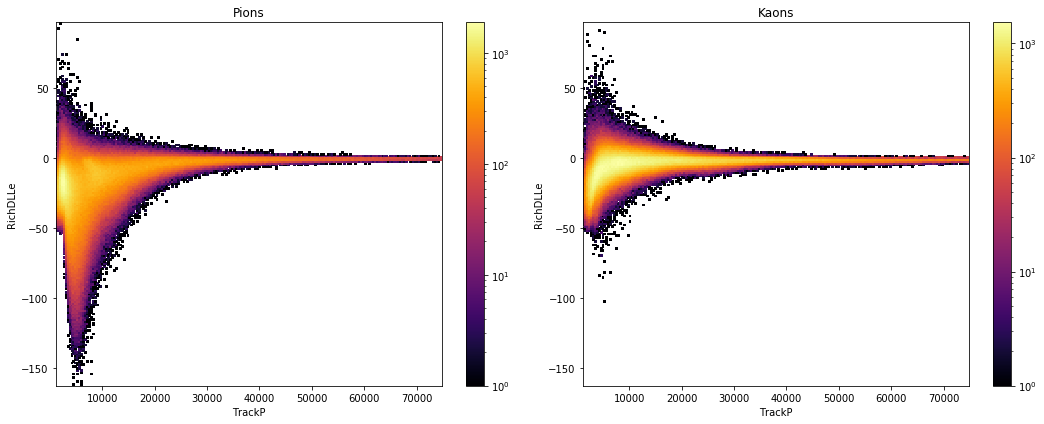

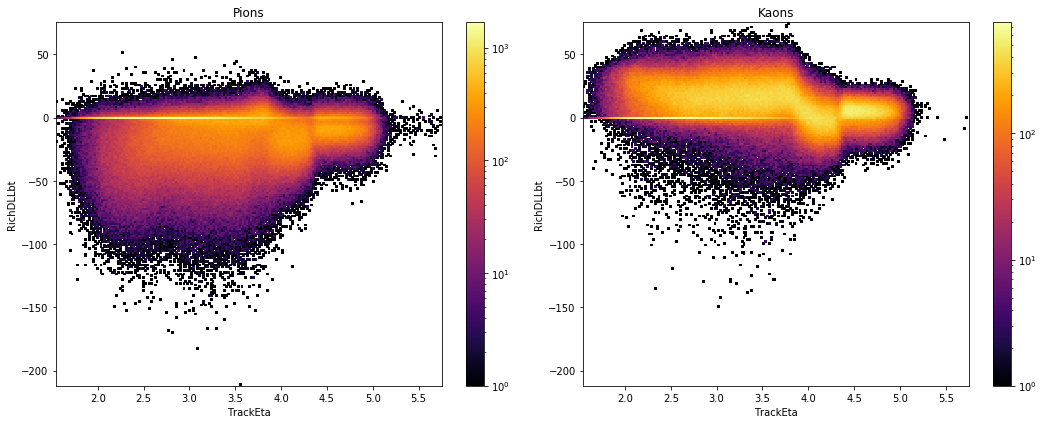

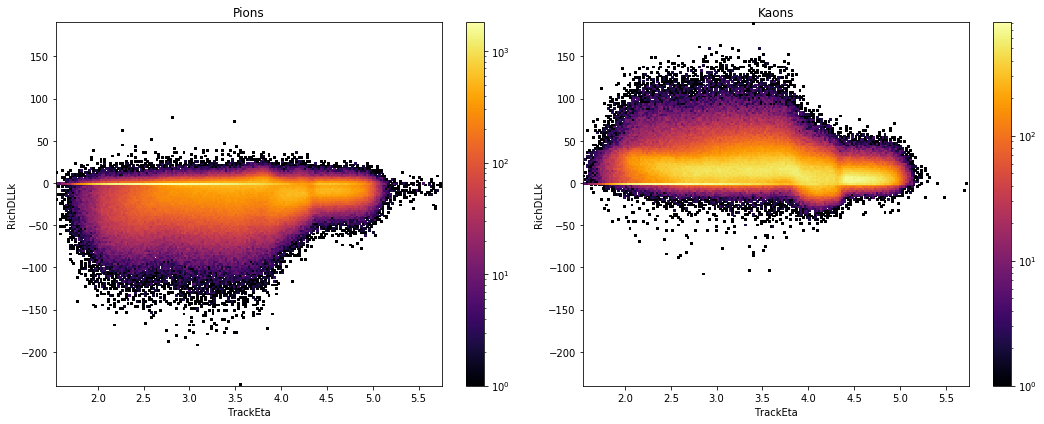

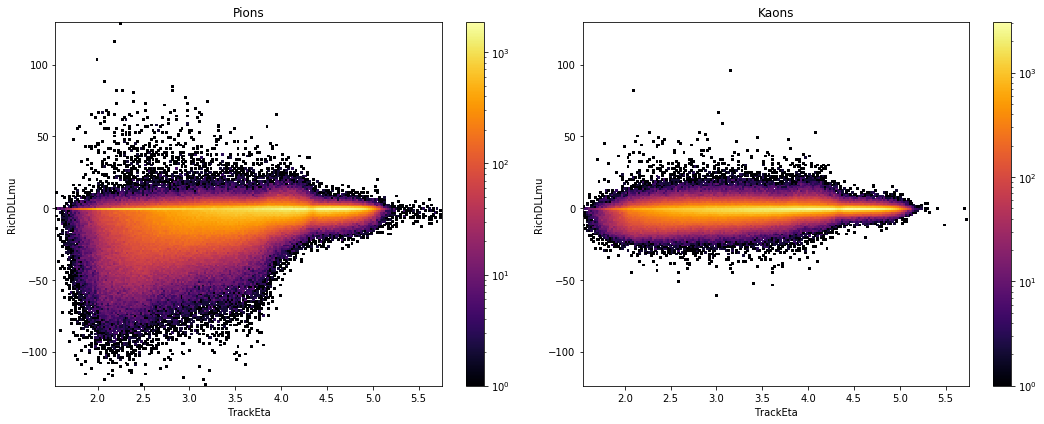

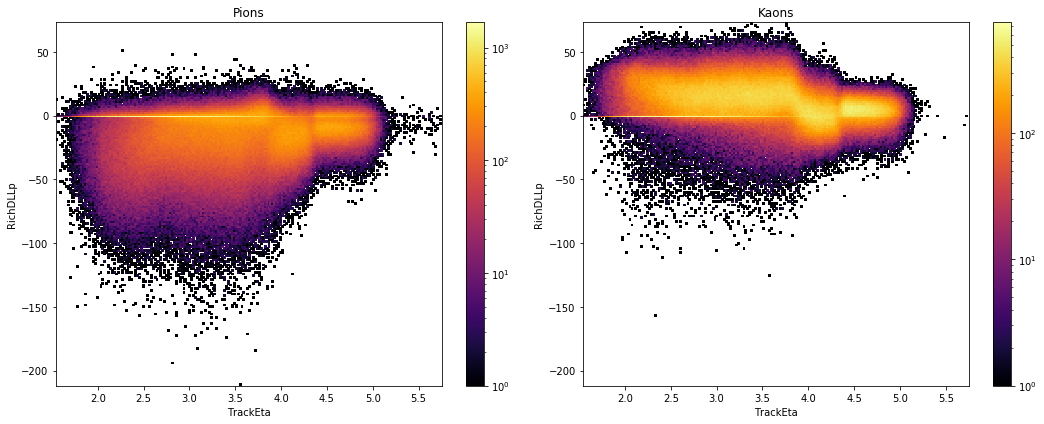

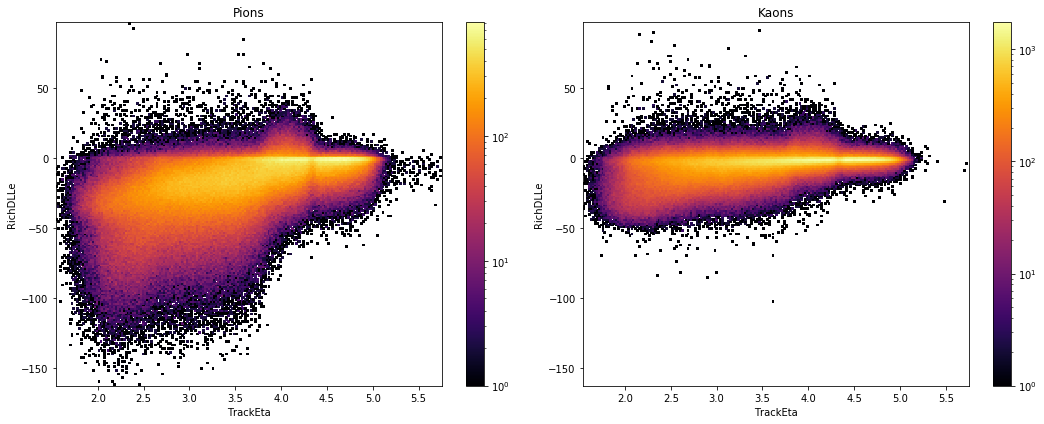

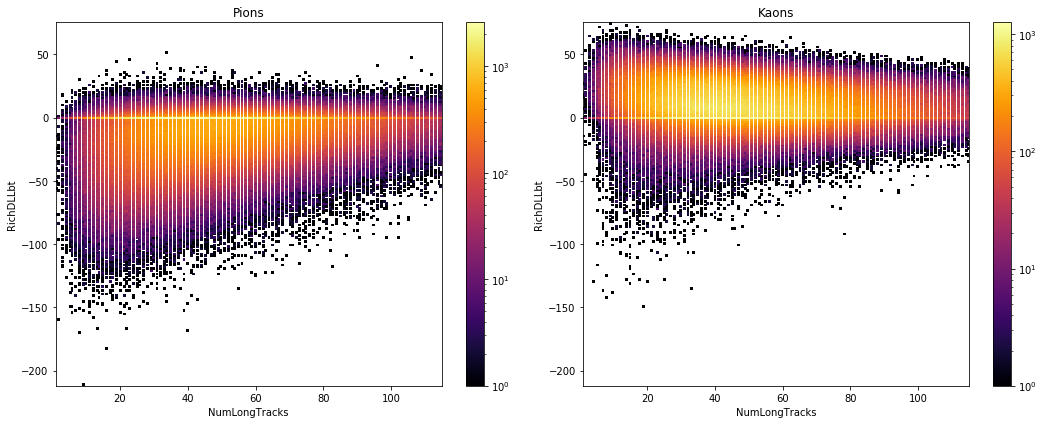

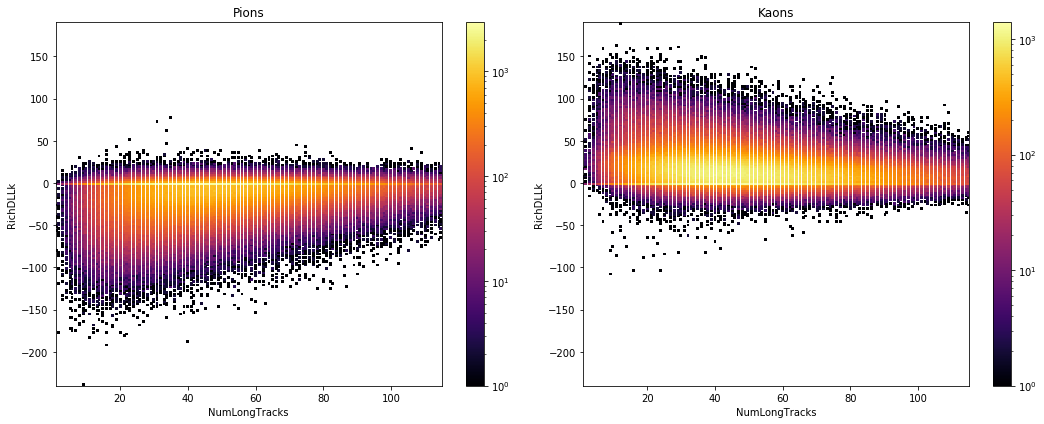

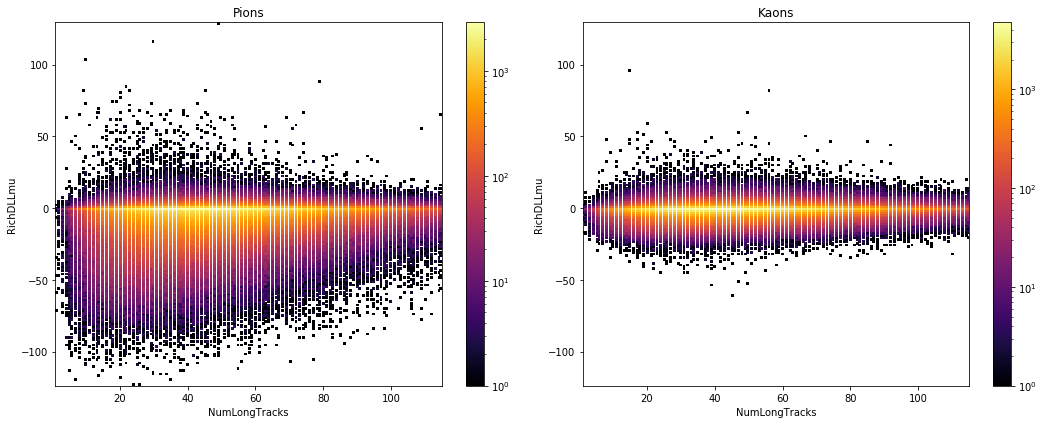

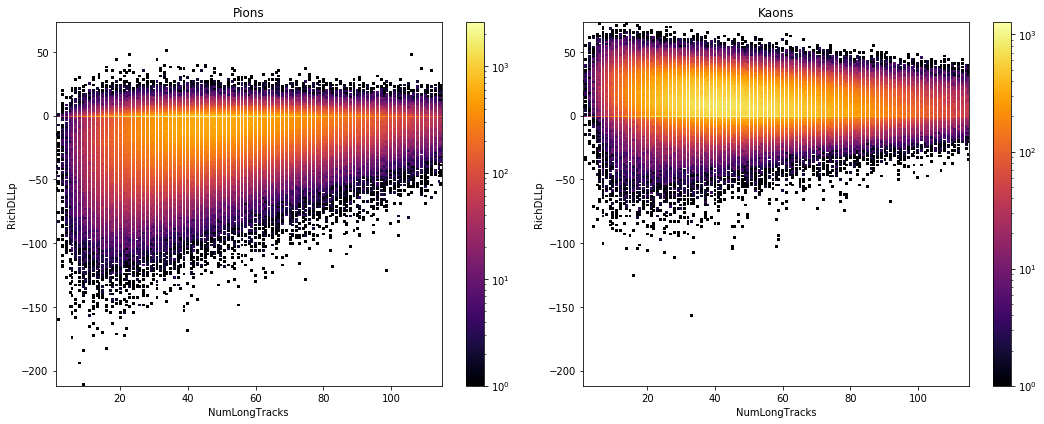

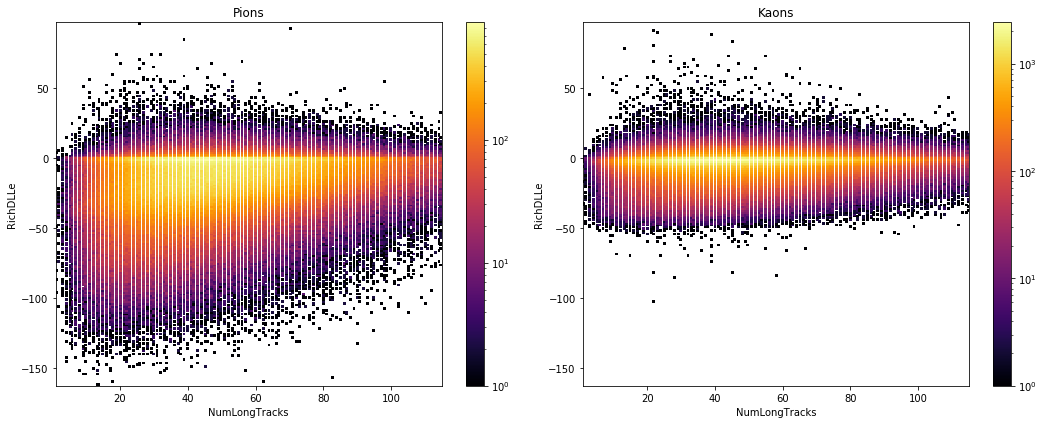

In [9]:
x_cols = ['TrackP', 'TrackEta', 'NumLongTracks']
y_cols = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']

pion_not_outliers = df_pion[not_outliers(df_pion, 3)]
kaon_not_outliers = df_kaon[not_outliers(df_kaon, 3)]

for x, y in product(x_cols,y_cols):
    
    """
    bins_x = np.linspace(
        start=min(np.quantile(df_pion[x],0.05) , np.quantile(df_kaon[x], 0.05)), 
        stop =max(np.quantile(df_pion[x],0.95) , np.quantile(df_kaon[x], 0.95)), 
        num=201
    )
    bins_y = np.linspace(
        start=min(np.quantile(df_pion[y],0.05) , np.quantile(df_kaon[y], 0.05)), 
        stop =max(np.quantile(df_pion[y],0.95) , np.quantile(df_kaon[y], 0.95)), 
        num=201
    )
    
    """
    
    bins_x = np.linspace(
        start=min(pion_not_outliers[x].min(),kaon_not_outliers[x].min()), 
        stop =max(pion_not_outliers[x].max(),kaon_not_outliers[x].max()), 
        num=201
    )
    bins_y = np.linspace(
        start=min(pion_not_outliers[y].min(),kaon_not_outliers[y].min()), 
        stop =max(pion_not_outliers[y].max(),kaon_not_outliers[y].max()), 
        num=201
    )
    
    hist2d(df_pion, df_kaon, x, y, 'Pions', 'Kaons',bins_x, bins_y)

# The simplest model possible

In [10]:
class Model:
    def train(self, X, Y):
        self.means = {}
        self.stds = {}
        for col in Y.columns:
            self.means[col] = np.mean(Y[col])
            self.stds [col] = np.std (Y[col])

    def predict(self, X):
        prediction = pd.DataFrame()
        for col in self.means.keys():
            prediction[col] = np.random.normal(
                                loc=self.means[col],
                                scale=self.stds[col],
                                size=len(X)
                            )
        return prediction

In [11]:
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

In [12]:
def score_func(sample1, sample2):
    score = 0
  
  # at first, let's ignore X
    for col in y_cols:
        score += ks_2samp(sample1[col], sample2[col])[0]
    return score

In [13]:
kf = KFold(n_splits=5)

model_scores = []
best_scores  = []

for train_index, test_index in kf.split(df_pion[x_cols]):
    X_train = df_pion[x_cols].iloc[train_index]
    Y_train = df_pion[y_cols].iloc[train_index]
    X_test  = df_pion[x_cols].iloc[test_index ]
    Y_test  = df_pion[y_cols].iloc[test_index ]
  
    model = Model()
    model.train(X_train[not_outlier_pion[train_index]], Y_train[not_outlier_pion[train_index]])
    Y_pred = model.predict(X_test)
  
    model_scores.append(score_func(Y_test, Y_pred ))
    best_scores .append(score_func(Y_test, Y_train))

In [14]:
best_scores

[0.0163778581688086,
 0.011739580610601291,
 0.013317199881085096,
 0.007422603995473093,
 0.01355892301169237]

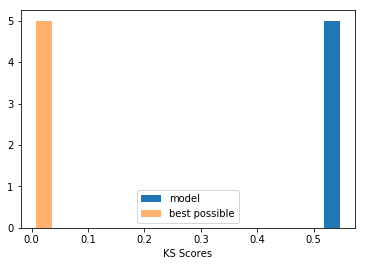

In [15]:
bins = np.linspace(
            start=min(model_scores + best_scores), 
            stop =max(model_scores + best_scores), 
            num=20
        )

plt.hist(model_scores, bins=bins, label='model')
plt.hist(best_scores , bins=bins, label='best possible', alpha=0.6)
plt.legend()
plt.xlabel('KS Scores');

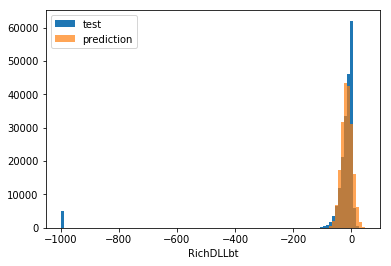

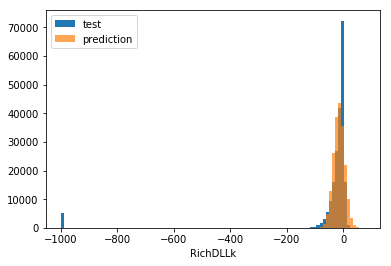

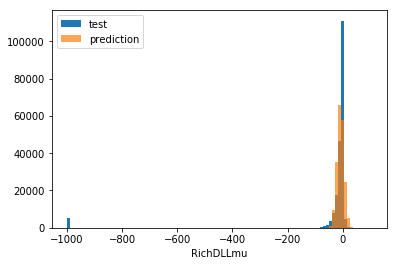

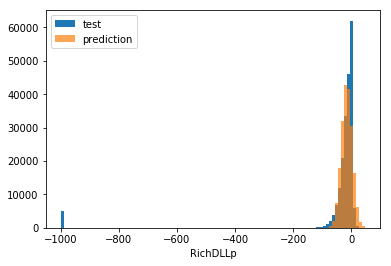

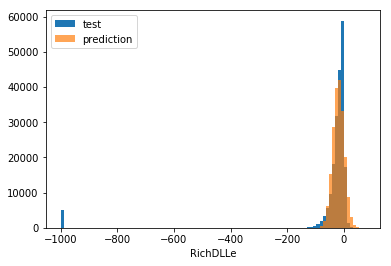

In [16]:
for col in Y_pred.columns:
    _, bins, _ = plt.hist(Y_test[col], bins=100 , label='test'      )
    _, _   , _ = plt.hist(Y_pred[col], bins=bins, label='prediction', alpha=0.7)
    plt.legend()
    plt.xlabel(col)
    plt.show();

In [17]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_pion.iloc[2][x_cols]

TrackP           5114.390137
TrackEta            2.318979
NumLongTracks      61.000000
Name: 2, dtype: float64

In [20]:
class myDS(Dataset):
    def __init__(self, data, in_cols, cond_cols):
        self.data = data
        self.in_cols = in_cols
        self.cond_cols = cond_cols
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        out = self.data.iloc[idx]
        return out[self.in_cols].values, out[self.cond_cols].values
        

In [21]:
SEED = 42
BATCH_SIZE = 256
EPOCHS = 5
torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
train, test = train_test_split(df_kaon)
train_loader = DataLoader(myDS(train,y_cols, x_cols), batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(myDS(test,y_cols, x_cols), batch_size = BATCH_SIZE, shuffle = True)

In [23]:
input_dim = len(y_cols)
latent_dim =  2
cond_dim = len(x_cols)

In [24]:
from models import CVAE
from torch.autograd import Variable

In [25]:
encoder_dims = [input_dim + cond_dim, 8,16,8]
decoder_dims = [8, 16,8, input_dim]

In [ ]:
from importlib import reload 
CVAE = reload(CVAE)

In [26]:
model = CVAE(encoder_dims, latent_dim, decoder_dims, cond_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, cond) in enumerate(train_loader):
        
        data = Variable(data.to(device))
        cond = Variable(cond.to(device))
        
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data,cond)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data,cond) in enumerate(test_loader):
            data = Variable(data.to(device))
            cond = Variable(cond.to(device))
            recon_batch, mu, logvar = model(data,cond)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(args.batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [27]:
for epoch in range(1, EPOCHS + 1):
    train(epoch)
    test(epoch)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')


RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #4 'mat1'